# Финальный проект

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
df_raw = pd.read_csv('../datasets/real_estate_data_.csv', sep='\t')

In [2]:
df_raw.drop_duplicates()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# здесь я оставлю в датафрейме только те города где 50+ объявлений

# получаю таблицу с количеством объявлений по городам
over_fifty = df_raw.groupby('locality_name').agg({'total_images': 'count'})

# изменияю название колонны для удобства
over_fifty = over_fifty.rename({'total_images': 'amount'}, axis=1)

# получаю таблицу с кол-вом объявлений больше 50шт., отстортированную по убыванию
over_fifty = over_fifty.query('amount > 50').sort_values('amount', ascending=False).reset_index()

'''
Произвожу слияние таблиц (over_fifty and df), для того чтобы получить оригинальный 
датасет, но содержащий города в которых кол-во объявлений больше 50шт.
Использовать буду параметр inner, так как он самый подходящий в этом случае
Колонна по которой будет происходить отбор - locality_name
'''
df_raw = df_raw.merge(over_fifty, on=['locality_name'], how='inner')

df_raw.groupby('locality_name').agg({'total_images': 'count'})

,total_images
locality_name,
Волхов,111
Всеволожск,398
Выборг,237
Гатчина,307
Кингисепп,104
Кириши,125
Кировск,84
Колпино,338
Коммунар,89


In [5]:
# также я заметил что колонна first_day_exposition имеет тип данных object, попробую перевести ее в тип данных datetime
df_raw['first_day_exposition'] = pd.to_datetime(df_raw['first_day_exposition'])

In [6]:
# Немного вошел во вкус и написал следующую функцию которая заполняет датасет.
# Надоело постоянно делать это по одному, тогда как данная функция заполняет автоматически все строки в зависимости от указанных аргументов функции.
# Подробное описание внутри функции.

def fill_nan_custom(*, data, str_val='Неизвестно', bool_val=False, num_median=True, num_mean=False):
    """
    При использовании этой фунции необходимо указывать название аргументов.
    Функция сыровата, но работает, не стал уделять ей слишком много времени на данном этапе, в будущем буду ее дорабатывать.
    
    data - датафрейм который необходимо заполнить.
    str_val - значение которое нужно вставить для типа данных object. ("Неизвестно" по умолчанию)
    bool_val - значение которое нужно вставить для типа данных bool. (False по умолчанию)
    num_median - заполнить цифровые значения(int, float) медианой. (True по умолчанию)
    num_mean - заполнить цифровые значения(int, float) средним числом. (False по умолчанию)
    """
    temp_data = data.copy() # Создаем копию датафрейма, который затем будем изменять.

    # Проверка заполненности аргументов функции.
    if (not num_median) and (not num_mean):
        print('At least one of the arguments must be assigned as True.')
        return 0
        
    elif num_median and num_mean:
        print('Both num_median and num_mean can not be assigned as True at the same time.')
        return 0
        
    # Проходим по каждой колонне и производим заполнение
    total_rows = len(data) # Максимально возможное кол-во рядов в колоннах.
    for column_name in temp_data:
        current_column_rows = temp_data[column_name].count() # Кол-во рядов в текущей колонне.
        if current_column_rows != total_rows:
            setter = '' # Переменная которая используется для вставки значения вместо NaN
            data_type = temp_data[column_name].dtype # Узнаем тип данных колонны
            # print(f'{column_name} - {data_type}')
            # Присваиваем значения переменной setter в зависимости от типа данных
            if is_numeric_dtype(temp_data[column_name]) and num_median:
                setter = temp_data[column_name].median()
            elif is_numeric_dtype(temp_data[column_name]) and num_mean:
                setter = temp_data[column_name].mean()
            else:
                setter = str_val if data_type == 'object' else bool_val
            temp_data[column_name] = temp_data[column_name].fillna(setter) # Итоговое изменение колонны
        #     print(f'{column_name.upper()} before: {current_column_rows}\n{column_name.upper()} NOW: {temp_data[column_name].count()}\n')
        # else:
        #     print(f'{column_name.upper()} is already full.\n')
    return temp_data # функция возвращает копию датасета, не меняя оригинальный.

In [7]:
df = fill_nan_custom(data=df_raw) # c этих пор наш датафрейм полностью заполнен
# bool - заполнены значением False
# object - заполнены значением Неизвестно
# int/float - заполнены медианой по значениям в колонне

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21636 entries, 0 to 21635
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21636 non-null  int64         
 1   last_price            21636 non-null  float64       
 2   total_area            21636 non-null  float64       
 3   first_day_exposition  21636 non-null  datetime64[ns]
 4   rooms                 21636 non-null  int64         
 5   ceiling_height        21636 non-null  float64       
 6   floors_total          21636 non-null  float64       
 7   living_area           21636 non-null  float64       
 8   floor                 21636 non-null  int64         
 9   is_apartment          21636 non-null  object        
 10  studio                21636 non-null  bool          
 11  open_plan             21636 non-null  bool          
 12  kitchen_area          21636 non-null  float64       
 13  balcony         

In [9]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,amount
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,Неизвестно,...,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,94.0,15721
1,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,Неизвестно,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,15721
2,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.1,9,Неизвестно,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,15721
3,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,Неизвестно,...,1.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,15721
4,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.1,22,Неизвестно,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,455.0,0.0,502.5,94.0,15721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,3,1900000.0,18.9,2016-04-04,1,2.65,16.0,16.0,12,Неизвестно,...,0.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,115.0,104
21632,8,2600000.0,36.0,2017-01-25,2,2.50,5.0,24.0,2,False,...,1.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,45.0,104
21633,3,3150000.0,45.3,2017-12-08,1,2.65,10.0,22.5,9,Неизвестно,...,2.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,124.0,104
21634,9,3200000.0,51.0,2016-07-02,2,2.50,9.0,30.0,9,False,...,1.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,120.0,104


Text(0.5, 1.0, 'Количество объявлений по городам')

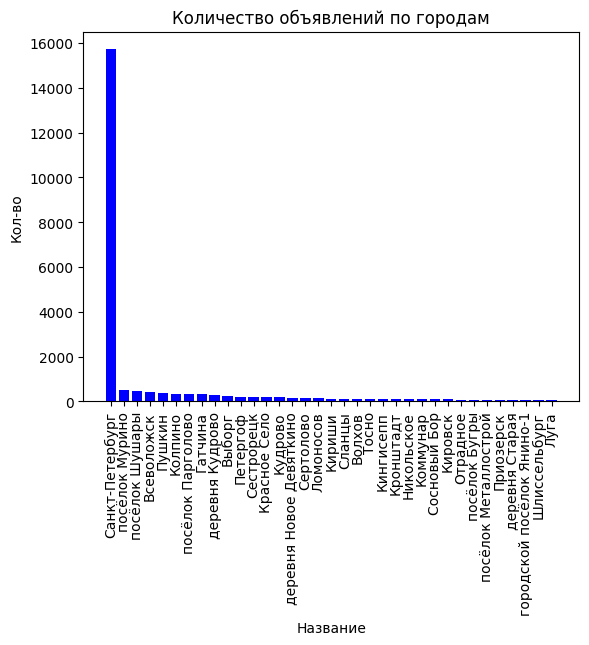

In [10]:
# Посмотрим кол-во объявлений по каждому городу
# Каждая строка это объявление на какую-либо квартиру/помещение

all_cities = df.groupby('locality_name').agg({'total_images': 'count'}).sort_values(by='total_images', ascending=False).reset_index()

vals = all_cities['total_images']
labels = all_cities['locality_name']

plt.xticks(rotation='vertical')
plt.bar(labels, vals, color='blue')

plt.xlabel('Название')
plt.ylabel('Кол-во')
plt.title('Количество объявлений по городам')

Text(0.5, 1.0, 'Количество объявлений по городам (без Санкт-Петербурга)')

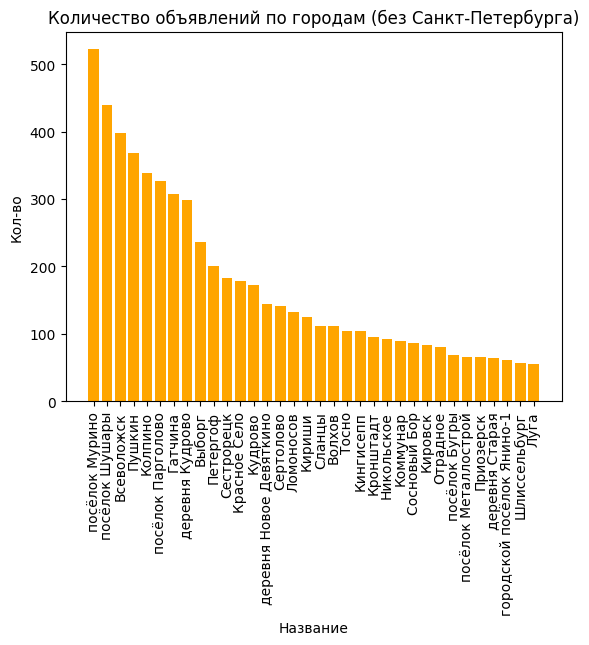

In [11]:
# без Cанкт-Петербурга
all_cities = df.groupby('locality_name').agg({'total_images': 'count'}).sort_values(by='total_images', ascending=False).reset_index()
all_cities = all_cities[all_cities['locality_name'] != 'Санкт-Петербург']
#saint_petersburg = df[df['locality_name'] == 'Санкт-Петербург'].copy()

vals = all_cities['total_images']
labels = all_cities['locality_name']

plt.xticks(rotation='vertical')
plt.bar(labels, vals, color='orange')

plt.xlabel('Название')
plt.ylabel('Кол-во')
plt.title('Количество объявлений по городам (без Санкт-Петербурга)')

In [12]:
# хотелось бы проверить за какой период у нас данные, это мы можем вычислить по колонне first_day_exposition

dates = df[['locality_name', 'first_day_exposition']].sort_values(by='first_day_exposition', ascending=False).reset_index()
dates.rename({'first_day_exposition': 'timestamp'}, axis=1, inplace=True)

In [13]:
dates['year_part'] = dates['timestamp'].dt.year

In [14]:
dates # тут легко можно увидеть что объявления из датафрейма были опубликованы в периоде с 2014 по 2019 года

,index,locality_name,timestamp,year_part
0,11921,Санкт-Петербург,2019-05-03,2019
1,18499,Колпино,2019-05-03,2019
2,7258,Санкт-Петербург,2019-05-03,2019
3,21004,Сосновый Бор,2019-05-03,2019
4,17621,Пушкин,2019-05-03,2019
...,...,...,...,...
21631,10522,Санкт-Петербург,2014-11-27,2014
21632,8799,Санкт-Петербург,2014-11-27,2014
21633,4457,Санкт-Петербург,2014-11-27,2014
21634,3182,Санкт-Петербург,2014-11-27,2014


In [15]:
# посчитаем кол-во объявлений за каждый год и положим все это на гистограмму.

year_activity = dates.groupby('year_part').agg({'locality_name': 'count'}).reset_index()
year_activity.rename({'locality_name': 'amount'}, axis=1, inplace=True)

Text(0.5, 1.0, 'Количество объявлений по годам')

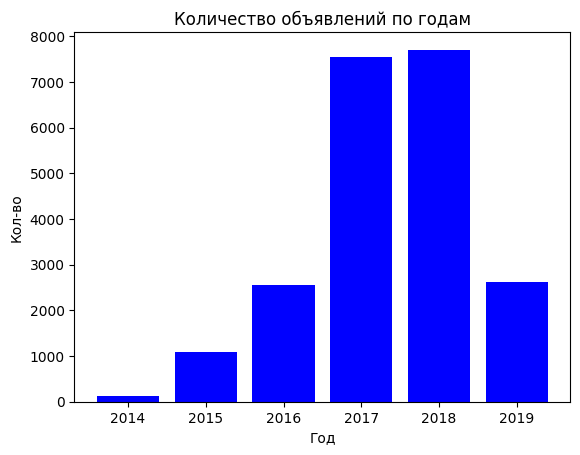

In [16]:
import matplotlib.pyplot as plt

plt.bar(year_activity['year_part'], year_activity['amount'], color='blue')

plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.title('Количество объявлений по годам')

In [17]:
# тут мы видим что больше всего объявлений было размещено в 2018 году
year_activity

,year_part,amount
0,2014,127
1,2015,1086
2,2016,2547
3,2017,7543
4,2018,7709
5,2019,2624


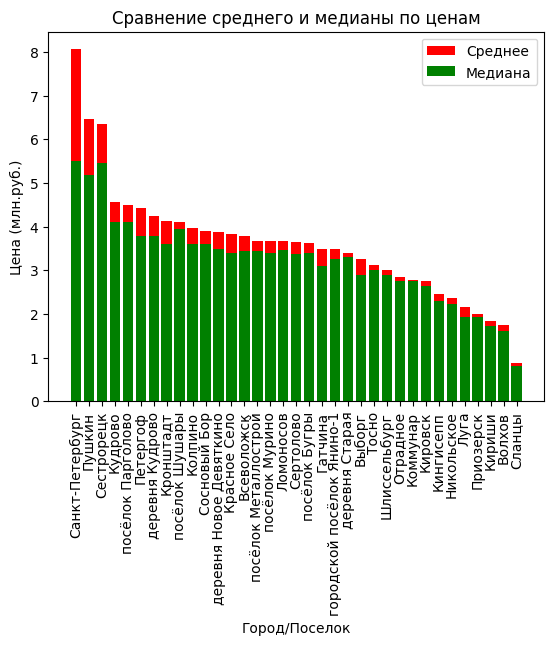

In [18]:
# теперь посмотрим среднее значение и медиану по ценам в каждом городе

mean_price = df.groupby('locality_name').agg({'last_price': 'mean'}).sort_values(by='last_price', ascending=False).reset_index()
mean_price['last_price'] = mean_price['last_price']/1_000_000

median_price = df.groupby('locality_name').agg({'last_price': 'median'}).sort_values(by='last_price', ascending=False).reset_index()
median_price['last_price'] = median_price['last_price']/1_000_000

plt.xticks(rotation='vertical')
plt.bar(mean_price['locality_name'], mean_price['last_price'], color='red', label='Среднее')
plt.bar(median_price['locality_name'], median_price['last_price'], color='green', label='Медиана')
plt.legend()

plt.xlabel('Город/Поселок')
plt.ylabel('Цена (млн.руб.)')
plt.title('Сравнение среднего и медианы по ценам')

plt.show()

# Мы видим что среднее значение всегда больше медианы. Это говорит нам о том что данные содержат выбросы которые влияют на среднее значение.
# То есть в данном случае отсутсвует нормальное распределение данных (right-skewed distribution).

# 1.  Посчитайте цену за квадратный метр (Подойдите к этому вопросу логически)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21636 entries, 0 to 21635
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21636 non-null  int64         
 1   last_price            21636 non-null  float64       
 2   total_area            21636 non-null  float64       
 3   first_day_exposition  21636 non-null  datetime64[ns]
 4   rooms                 21636 non-null  int64         
 5   ceiling_height        21636 non-null  float64       
 6   floors_total          21636 non-null  float64       
 7   living_area           21636 non-null  float64       
 8   floor                 21636 non-null  int64         
 9   is_apartment          21636 non-null  object        
 10  studio                21636 non-null  bool          
 11  open_plan             21636 non-null  bool          
 12  kitchen_area          21636 non-null  float64       
 13  balcony         

In [20]:

sqare_meter_price = df[['locality_name', 'last_price', 'total_area']].copy() # берём нужные колонны из датасета

sqare_meter_price['PRICE_PER_SQUARED_METER'] = sqare_meter_price['last_price'] / sqare_meter_price['total_area']
sqare_meter_price['PRICE_PER_SQUARED_METER'] = sqare_meter_price['PRICE_PER_SQUARED_METER'].apply(lambda x: "{:,.3f}".format(x))
sqare_meter_price['PRICE_PER_SQUARED_METER'] = sqare_meter_price['PRICE_PER_SQUARED_METER'].str.replace(',', '').astype(float)
sqare_meter_price = sqare_meter_price.sort_values(by='PRICE_PER_SQUARED_METER')
sqare_meter_price

,locality_name,last_price,total_area,PRICE_PER_SQUARED_METER
5819,Санкт-Петербург,12190.0,109.0,111.835
20696,Сланцы,500000.0,52.0,9615.385
20727,Сланцы,550000.0,54.0,10185.185
18946,Гатчина,1450000.0,138.0,10507.246
20790,Сланцы,470000.0,44.5,10561.798
...,...,...,...,...
3298,Санкт-Петербург,124000000.0,124.5,995983.936
9762,Санкт-Петербург,401300000.0,401.0,1000748.130
15160,Санкт-Петербург,289238400.0,187.5,1542604.800
945,Санкт-Петербург,330000000.0,190.0,1736842.105


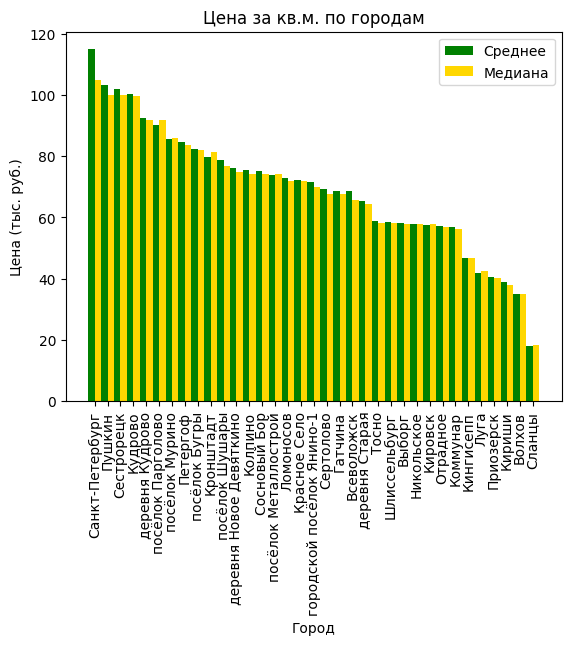

In [21]:
vis_data_mean = sqare_meter_price.groupby('locality_name').agg({'PRICE_PER_SQUARED_METER': 'mean'}).sort_values(by='PRICE_PER_SQUARED_METER', ascending=False).reset_index()
vis_data_median = sqare_meter_price.groupby('locality_name').agg({'PRICE_PER_SQUARED_METER': 'median'}).sort_values(by='PRICE_PER_SQUARED_METER', ascending=False).reset_index()

labels_mean = vis_data_mean['locality_name']
vals_mean = vis_data_mean['PRICE_PER_SQUARED_METER'] / 1_000

labels_median = vis_data_median['locality_name']
vals_median = vis_data_median['PRICE_PER_SQUARED_METER'] / 1_000

# Создание фигуры и осей
fig, ax = plt.subplots()

# Ширина каждого столбца
bar_width = 0.5

# Создание первого столбчатого графика
ax.bar(np.arange(len(labels_mean)), vals_mean, bar_width, color='green', linewidth=20, align='center', label='Среднее')

# Создание второго столбчатого графика с смещением по x
ax.bar(np.arange(len(labels_median)) + bar_width, vals_median, bar_width, color='gold', linewidth=20, align='center', label='Медиана')

# Установка подписей по оси x
ax.set_xticks(np.arange(len(labels_mean)) + bar_width / 2)
ax.set_xticklabels(labels_mean, rotation='vertical')

# Добавление подписей осей и заголовка
plt.xlabel('Город')
plt.ylabel('Цена (тыс. руб.)')
plt.title('Цена за кв.м. по городам')

# Добавление легенды
plt.legend()

# Показать график
plt.show()

# 2.  Выделите только данные из города Санкт-Петербург

In [22]:
saint_petersburg = df[df['locality_name'] == 'Санкт-Петербург'].copy()
saint_petersburg

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,amount
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,Неизвестно,...,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,94.0,15721
1,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,Неизвестно,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,15721
2,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.1,9,Неизвестно,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,15721
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,Неизвестно,...,1.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,15721
4,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.1,22,Неизвестно,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,455.0,0.0,502.5,94.0,15721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,Неизвестно,...,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,15721
15717,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,Неизвестно,...,1.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,502.5,15.0,15721
15718,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,Неизвестно,...,1.0,Санкт-Петербург,19424.0,4489.0,0.0,455.0,1.0,806.0,519.0,15721
15719,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,Неизвестно,...,1.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,94.0,15721


# 3.  Постройте гистограммы и ответьте на вопросы:

### - Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?

In [23]:
saint_petersburg['year_part'] = saint_petersburg['first_day_exposition'].dt.year
saint_petersburg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15721 entries, 0 to 15720
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          15721 non-null  int64         
 1   last_price            15721 non-null  float64       
 2   total_area            15721 non-null  float64       
 3   first_day_exposition  15721 non-null  datetime64[ns]
 4   rooms                 15721 non-null  int64         
 5   ceiling_height        15721 non-null  float64       
 6   floors_total          15721 non-null  float64       
 7   living_area           15721 non-null  float64       
 8   floor                 15721 non-null  int64         
 9   is_apartment          15721 non-null  object        
 10  studio                15721 non-null  bool          
 11  open_plan             15721 non-null  bool          
 12  kitchen_area          15721 non-null  float64       
 13  balcony              

Text(0.5, 1.0, 'Среднее кол-во дней для продажи по годам')

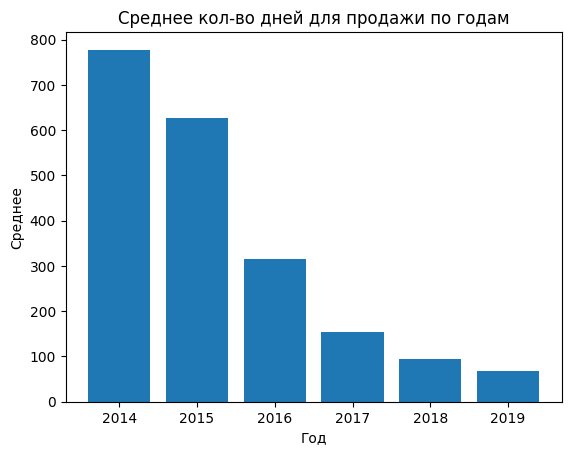

In [24]:
# посчитаем среднее за каждый год

mean_vals = saint_petersburg.groupby('year_part')['days_exposition'].mean()
mean_vals_dict = mean_vals.to_dict()

years = mean_vals_dict.keys()
vals = mean_vals_dict.values()

plt.bar(years, vals)

plt.xlabel('Год')
plt.ylabel('Среднее')
plt.title('Среднее кол-во дней для продажи по годам')

# график ниже демонстрирует нам что кол-во дней которое уходит на продажу недвижимости падает каждый год.
# или объявление просто удаляют с площадки :)

- Сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)

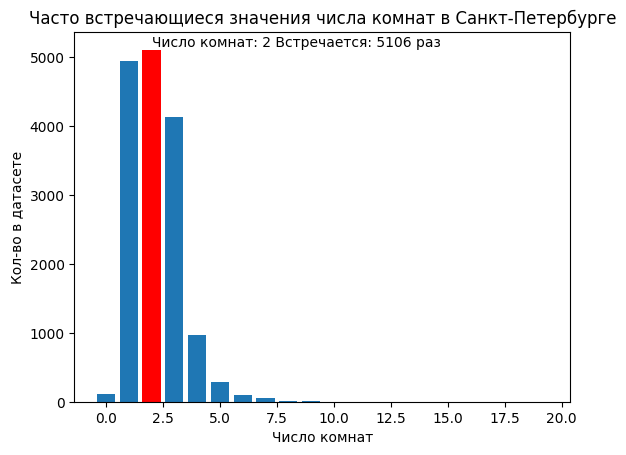

In [25]:
# С помощью чата-гпт сгенерировал следующую гистограмму которая дает нам понять что чаще всего встречаются 2-х комнатные квартиры.

# Calculate value counts for the 'rooms' column
value_counts = saint_petersburg['rooms'].value_counts()

# Convert value counts to a dictionary
most_freq_rooms = value_counts.to_dict()

# Extract keys and values from the dictionary
years = list(most_freq_rooms.keys())
vals = list(most_freq_rooms.values())

# Create the bar plot
plt.bar(years, vals)

# Add labels and title
plt.xlabel('Число комнат')
plt.ylabel('Кол-во в датасете')
plt.title('Часто встречающиеся значения числа комнат в Санкт-Петербурге')

# Find the key corresponding to the maximum value
highest_bar_key = max(most_freq_rooms, key=most_freq_rooms.get)

# Highlight the highest bar by setting a different color
plt.bar(highest_bar_key, most_freq_rooms[highest_bar_key], color='red')

# Annotate the highest bar with its value
plt.annotate(f'Число комнат: {highest_bar_key} Встречается: {most_freq_rooms[highest_bar_key]} раз', 
             xy=(highest_bar_key, most_freq_rooms[highest_bar_key]), 
             xytext=(highest_bar_key, most_freq_rooms[highest_bar_key] + 40),
             color='black')

# Show the plot
plt.show()

- Распределение высоты потолков в Санкт-Петербурге

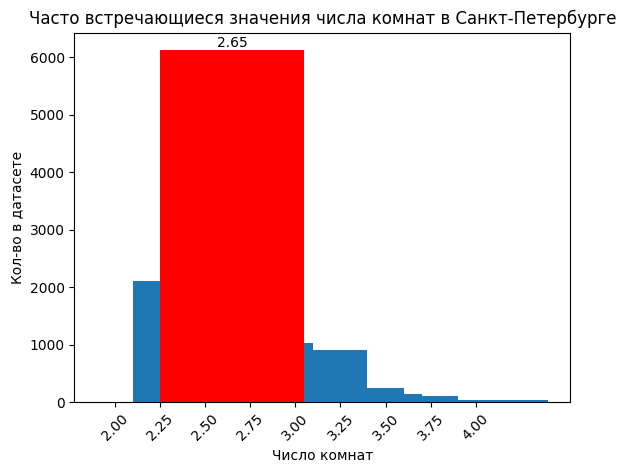

In [26]:
hist_data = saint_petersburg.groupby('ceiling_height').agg({'total_images': 'count'}).sort_values(by='ceiling_height', ascending=False).reset_index()
hist_data.rename(columns={"total_images": "count"}, inplace=True)
hist_data = hist_data.query('ceiling_height > 2 and ceiling_height <= 4')

vals = hist_data['ceiling_height']
count = hist_data['count']

# Create the bar plot
plt.bar(vals, count)

# Find the highest value(s)
highest_values = hist_data[hist_data['count'] == hist_data['count'].max()]

# Highlight the bars corresponding to the highest value(s) with red color
for val in highest_values['ceiling_height']:
    plt.bar(val, hist_data.loc[hist_data['ceiling_height'] == val, 'count'], color='red')

# Annotate the highest value(s) on the plot with a label
for val, cnt in zip(highest_values['ceiling_height'], highest_values['count']):
    plt.text(val, cnt, f'{val}', ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Число комнат')
plt.ylabel('Кол-во в датасете')
plt.title('Часто встречающиеся значения числа комнат в Санкт-Петербурге')

# Manually specify the desired x-axis ticks
desired_ticks = [2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
plt.xticks(desired_ticks)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# я постарался выбрать самый адекватный диапазон эксперементируя с графиками и пришел к тому что подходящий диапазон с 2 до 4
# с помощью своего друга (Chat-GPT) постараля показать число которое является самым популярным - это 2.65
# однако на графике мы видим что размер потолков в диапазоне от 2.25 до ~3.1, почти в равной степени пользуется спросом

# 4.  Теперь постройте такие же гистограммы по второму по дороговизне городу

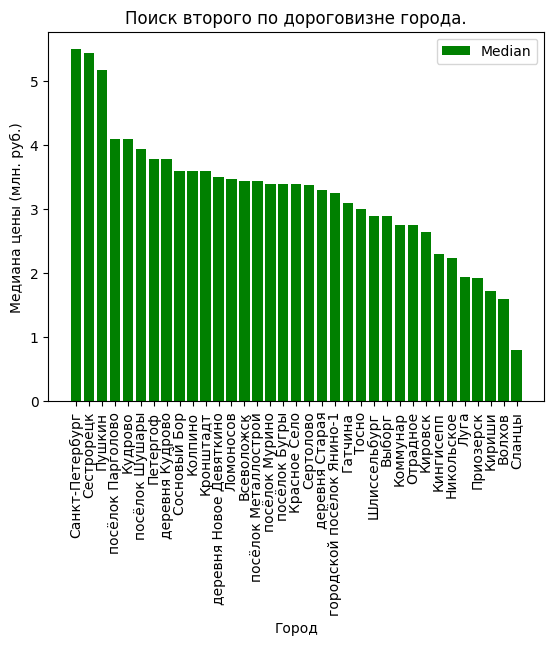

In [27]:
# Я думаю будет правильнее оценивать дороговизну города по медиане цены
# так как мы уже знаем что в нашем датасете имеются выбросы и ориентироваться на среднее будет неправильно.

median_price = df.groupby('locality_name').agg({'last_price': 'median'}).sort_values(by='last_price', ascending=False).reset_index()
median_price['last_price'] = median_price['last_price']/1_000_000

plt.xticks(rotation='vertical')
plt.bar(median_price['locality_name'], median_price['last_price'], color='green', label='Median')
plt.legend()
plt.xlabel('Город')
plt.ylabel('Медиана цены (млн. руб.)')
plt.title('Поиск второго по дороговизне города.')

plt.show()
# из этого вытекает, что город №2 по цене - это Сестрорецк.
# проделаю с ним ровно те же операции что и с Питером.

In [28]:
# отделим Сестрорецк первым делом
sestroretsk = df[df['locality_name'] == 'Сестрорецк'].copy()
sestroretsk

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,amount
20255,7,3990000.0,48.00,2018-09-28,1,3.25,5.0,20.5,1,False,...,1.0,Сестрорецк,57998.0,34928.0,0.0,455.0,2.0,443.0,216.0,183
20256,11,4400000.0,53.60,2018-03-31,2,2.55,10.0,29.2,10,Неизвестно,...,1.0,Сестрорецк,60883.0,36102.0,1.0,341.0,2.0,256.0,55.0,183
20257,17,7430000.0,60.20,2019-02-28,2,2.50,4.0,30.1,2,Неизвестно,...,1.0,Сестрорецк,54526.0,35625.0,0.0,455.0,0.0,502.5,94.0,183
20258,10,3100000.0,31.10,2016-06-09,1,2.50,5.0,18.1,4,Неизвестно,...,0.0,Сестрорецк,57893.0,34821.0,1.0,195.0,2.0,315.0,520.0,183
20259,2,3700000.0,39.70,2017-07-11,1,2.55,4.0,21.0,1,Неизвестно,...,0.0,Сестрорецк,57025.0,33954.0,2.0,357.0,2.0,248.0,37.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20433,1,4709190.0,34.25,2017-06-20,1,2.65,21.0,17.0,9,Неизвестно,...,1.0,Сестрорецк,56914.0,33843.0,1.0,206.0,2.0,298.0,376.0,183
20434,10,4850000.0,60.50,2019-01-12,2,2.70,5.0,30.5,3,Неизвестно,...,1.0,Сестрорецк,58041.0,34970.0,1.0,879.0,2.0,447.0,60.0,183
20435,12,7400000.0,57.80,2017-08-17,2,2.65,8.0,31.9,8,Неизвестно,...,2.0,Сестрорецк,55942.0,32872.0,0.0,455.0,1.0,464.0,159.0,183
20436,5,5150000.0,45.00,2019-01-22,2,2.60,9.0,27.0,8,Неизвестно,...,1.0,Сестрорецк,57720.0,34650.0,2.0,426.0,1.0,456.0,94.0,183


In [29]:
sestroretsk['year_part'] = sestroretsk['first_day_exposition'].dt.year
sestroretsk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 20255 to 20437
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          183 non-null    int64         
 1   last_price            183 non-null    float64       
 2   total_area            183 non-null    float64       
 3   first_day_exposition  183 non-null    datetime64[ns]
 4   rooms                 183 non-null    int64         
 5   ceiling_height        183 non-null    float64       
 6   floors_total          183 non-null    float64       
 7   living_area           183 non-null    float64       
 8   floor                 183 non-null    int64         
 9   is_apartment          183 non-null    object        
 10  studio                183 non-null    bool          
 11  open_plan             183 non-null    bool          
 12  kitchen_area          183 non-null    float64       
 13  balcony            

In [30]:
saint_petersburg = df[df['locality_name'] == 'Санкт-Петербург'].copy()
saint_petersburg

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,amount
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,Неизвестно,...,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,94.0,15721
1,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,Неизвестно,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,15721
2,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.1,9,Неизвестно,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,15721
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,Неизвестно,...,1.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,15721
4,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.1,22,Неизвестно,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,455.0,0.0,502.5,94.0,15721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,Неизвестно,...,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,15721
15717,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,Неизвестно,...,1.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,502.5,15.0,15721
15718,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,Неизвестно,...,1.0,Санкт-Петербург,19424.0,4489.0,0.0,455.0,1.0,806.0,519.0,15721
15719,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,Неизвестно,...,1.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,94.0,15721


### - Сколько примерно дней занимает продажа объявлений в Сестрорецке?

Text(0.5, 1.0, 'Среднее кол-во дней для продажи по годам')

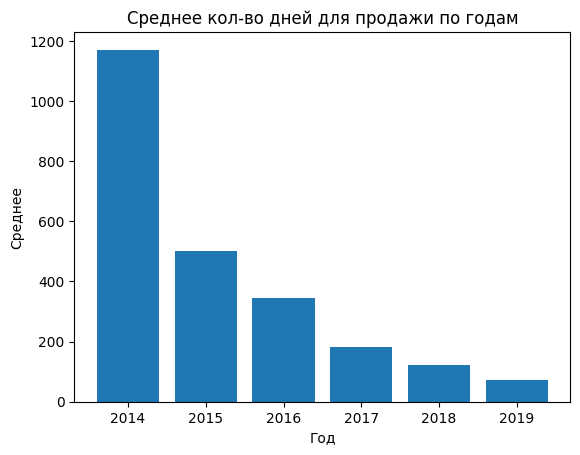

In [31]:
# посчитаем среднее за каждый год

sest_mean_vals = sestroretsk.groupby('year_part')['days_exposition'].mean()
sest_mean_vals_dict = sest_mean_vals.to_dict()

sest_years = sest_mean_vals_dict.keys()
sest_vals = sest_mean_vals_dict.values()

plt.bar(sest_years, sest_vals)

plt.xlabel('Год')
plt.ylabel('Среднее')
plt.title('Среднее кол-во дней для продажи по годам')

# в этом городе мы видим ту же картину что и при анализе Питера.

- Сколько обычно комнат в квартирах Сестрорецка (Часто встречающиеся значения)

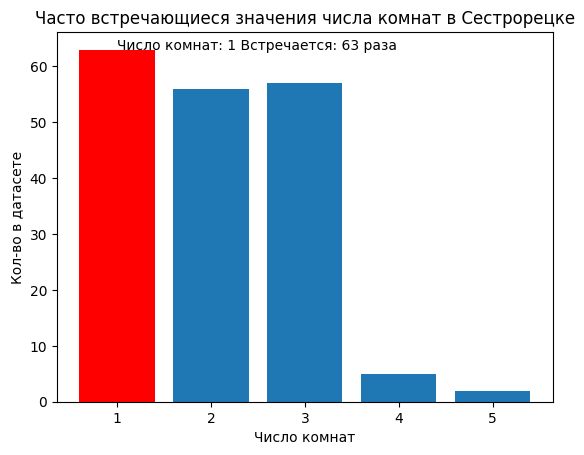

In [32]:
# С помощью чата-гпт сгенерировал следующую гистограмму которая дает нам понять что чаще всего встречаются 2-х комнатные квартиры.

# Calculate value counts for the 'rooms' column
sest_value_counts = sestroretsk['rooms'].value_counts()

# Convert value counts to a dictionary
sest_most_freq_rooms = sest_value_counts.to_dict()

# Extract keys and values from the dictionary
sest_years = list(sest_most_freq_rooms.keys())
sest_vals = list(sest_most_freq_rooms.values())

# Create the bar plot
plt.bar(sest_years, sest_vals)

# Add labels and title
plt.xlabel('Число комнат')
plt.ylabel('Кол-во в датасете')
plt.title('Часто встречающиеся значения числа комнат в Сестрорецке')

# Find the key corresponding to the maximum value
sest_highest_bar_key = max(sest_most_freq_rooms, key=sest_most_freq_rooms.get)

# Highlight the highest bar by setting a different color
plt.bar(sest_highest_bar_key, sest_most_freq_rooms[sest_highest_bar_key], color='red')

# Annotate the highest bar with its value
plt.annotate(f'Число комнат: {sest_highest_bar_key} Встречается: {sest_most_freq_rooms[sest_highest_bar_key]} раза', 
             xy=(sest_highest_bar_key, sest_most_freq_rooms[sest_highest_bar_key]), 
             xytext=(sest_highest_bar_key, sest_most_freq_rooms[sest_highest_bar_key]),
             color='black')

# Show the plot
plt.show()

# мы видим что в городе (или поселке) Серстрорецк чаще всего продаются 1-комнатные квартиры.

- Распределение высоты потолков в Сестрорецке

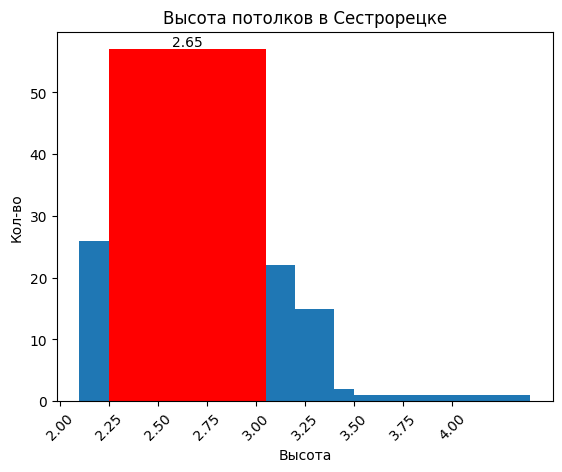

In [33]:
sest_hist_data = sestroretsk.groupby('ceiling_height').agg({'total_images': 'count'}).sort_values(by='ceiling_height', ascending=False).reset_index()
sest_hist_data.rename(columns={"total_images": "count"}, inplace=True)
sest_hist_data = sest_hist_data.query('ceiling_height > 2 and ceiling_height <= 4')

sest_vals = sest_hist_data['ceiling_height']
sest_count = sest_hist_data['count']

# Create the bar plot
plt.bar(sest_vals, sest_count)

# Find the highest value(s)
sest_highest_values = sest_hist_data[sest_hist_data['count'] == sest_hist_data['count'].max()]

# Highlight the bars corresponding to the highest value(s) with red color
for sest_val in sest_highest_values['ceiling_height']:
    plt.bar(sest_val, sest_hist_data.loc[sest_hist_data['ceiling_height'] == sest_val, 'count'], color='red')

# Annotate the highest value(s) on the plot with a label
for sest_val, sest_cnt in zip(sest_highest_values['ceiling_height'], sest_highest_values['count']):
    plt.text(sest_val, sest_cnt, f'{sest_val}', ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Высота')
plt.ylabel('Кол-во')
plt.title('Высота потолков в Сестрорецке')

# Manually specify the desired x-axis ticks
sest_desired_ticks = [2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
plt.xticks(sest_desired_ticks)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# интересно, но в Сестрорецке картина такая же как и в Санкт-Петербурге

# 5.  Что вы можете сказать по данным из Санкт Петербурга и выбранному городу?

1. Санкт-петербург превосходит выбранный город (Сестрорецк) как по количеству продаваемых квартир, так и по цене.
2. В Санкт-Петербурге популярностью пользуются 2-х комнатные квартиры, тогда как в Сестрорецке предпочитают 1-комнатные.
3. Высота потолков (популярная) в квартирах обоих городов находится в одном диапазоне - от 2.25 до ~3.1 м.
4. Квартиры в Питере продаются немного быстрее чем в Сестрорецке. На графике, где было произведено сравнение дней необходимых для продажи квартиры,
   можно заметить, что кол-во дней падает каждый год. Соответсвтенно можно предположить, что в будущем разницы в количестве дней на
   продажу и вовсе не будет.

# 6.  В каком из двух городов квартиры продаются быстрее и в каком из всех городов идет наименьшая средняя продолжительность продажи квартиры?

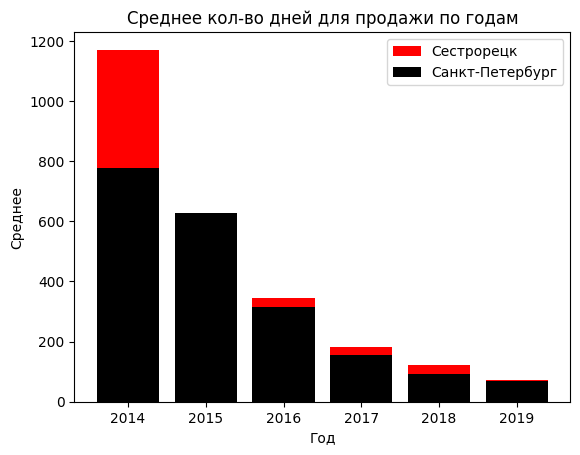

In [34]:
# для оценки разницы я наложил две гистораммы, которые сделал выше, друг на друга
# тут мы видим что квартиры в Сестрорецке продаются немного дольше чем в Санкт-Петербурге (если смотреть на 2019)
# а так же видим какая была ситуация в другие года

# данные по Санкт-Петербургу
years = mean_vals_dict.keys()
vals = mean_vals_dict.values()
# данные по Сестрорецку
sest_years = sest_mean_vals_dict.keys()
sest_vals = sest_mean_vals_dict.values()

plt.bar(sest_years, sest_vals, color = 'red', label='Сестрорецк')
plt.bar(years, vals, color = 'black', label='Санкт-Петербург')

plt.xlabel('Год')
plt.ylabel('Среднее')
plt.title('Среднее кол-во дней для продажи по годам')

plt.legend()

plt.show()

# 7. Создайте отдельный столбец, где будет разметка того, находится ли недвижимость на последнем этаже или нет.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21636 entries, 0 to 21635
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21636 non-null  int64         
 1   last_price            21636 non-null  float64       
 2   total_area            21636 non-null  float64       
 3   first_day_exposition  21636 non-null  datetime64[ns]
 4   rooms                 21636 non-null  int64         
 5   ceiling_height        21636 non-null  float64       
 6   floors_total          21636 non-null  float64       
 7   living_area           21636 non-null  float64       
 8   floor                 21636 non-null  int64         
 9   is_apartment          21636 non-null  object        
 10  studio                21636 non-null  bool          
 11  open_plan             21636 non-null  bool          
 12  kitchen_area          21636 non-null  float64       
 13  balcony         

In [36]:
# сперва я конвертирую результат в int тем самым заношу значения 0 и 1 в каждый ряд
# затем конвертирую все значения в bool чтобы было понятнее

# Весь датасет
df['last_floor'] = (df['floor'] == df['floors_total']).astype(int).astype(bool)

# Санкт-петербург
saint_petersburg['last_floor'] = (saint_petersburg['floor'] == saint_petersburg['floors_total']).astype(int).astype(bool)

# Сестрорецк
sestroretsk['last_floor'] = (sestroretsk['floor'] == sestroretsk['floors_total']).astype(int).astype(bool)

# 8.  Посмотрите количество комнат по квартирам расположенным на последнем этаже

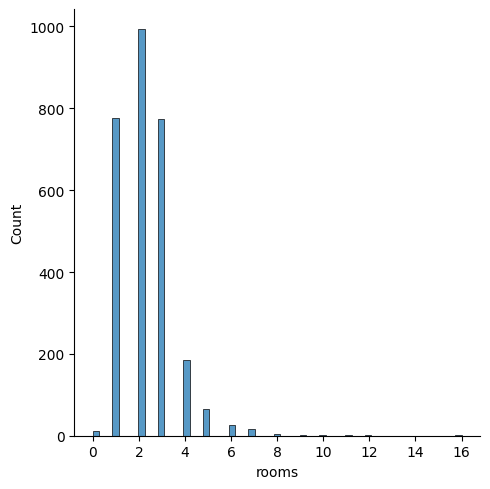

In [37]:
import seaborn as sns

rooms_last_floor = df.loc[df['last_floor'] == True, ['rooms', 'last_floor']]

sns.displot(rooms_last_floor['rooms'])
# в основном на последнем этаже находятся 2-х комнатные квартиры

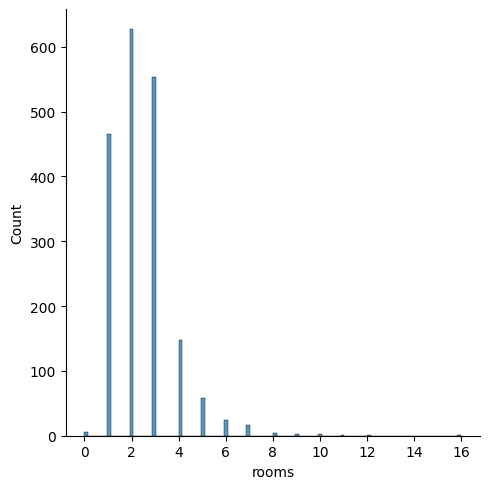

In [38]:
# Санкт-Петербург
SP_rooms_last_floor = saint_petersburg.loc[df['last_floor'] == True, ['rooms', 'last_floor']]

sns.displot(SP_rooms_last_floor['rooms'])
# в Питере также на последнем этаже располагаются в большей части двухкомнатные квартиры.

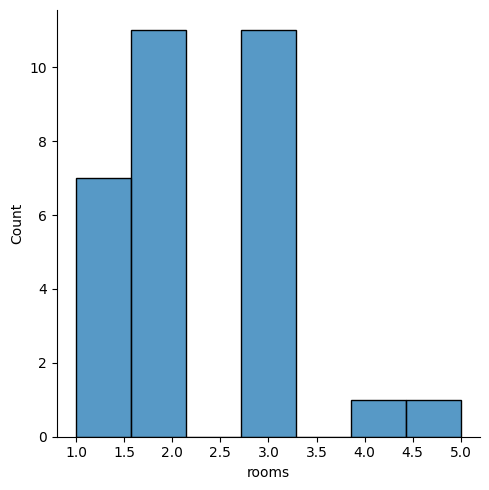

In [39]:
# Сестрорецк
SEST_rooms_last_floor = sestroretsk.loc[df['last_floor'] == True, ['rooms', 'last_floor']]

sns.displot(SEST_rooms_last_floor['rooms'])
# а вот в Сестрорецке как 2-х так и 3-х комнатные, находятся на самом верху.

# 9.  Посчитайте среднюю цену квартир расположенных на последнем этаже

In [40]:
rooms_last_floor = df.loc[df['last_floor'] == True, ['rooms', 'last_price','last_floor']]
rooms_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
rooms_last_floor['last_price(mln)'] = rooms_last_floor['last_price(mln)'] / 1_000_000

mean_price = round(rooms_last_floor['last_price(mln)'].mean(), 2)
print(f"Общая средняя цена за квартиры на самом последнем этаже: {mean_price} млн. руб.")

Общая средняя цена за квартиры на самом последнем этаже: 8.17 млн. руб.


In [41]:
# Санкт-Петербург
SP_rooms_last_floor = saint_petersburg.loc[saint_petersburg['last_floor'] == True, ['rooms', 'last_price','last_floor']]
SP_rooms_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
SP_rooms_last_floor['last_price(mln)'] = SP_rooms_last_floor['last_price(mln)'] / 1_000_000

SP_non_last_floor = saint_petersburg.loc[saint_petersburg['last_floor'] == False, ['rooms', 'last_price', 'last_floor']]
SP_non_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
SP_non_last_floor['last_price(mln)'] = SP_non_last_floor['last_price(mln)'] / 1_000_000

SP_mean_price = round(SP_rooms_last_floor['last_price(mln)'].mean(), 2) # последний этаж
SP_total_mean_price = round((saint_petersburg['last_price'] / 1_000_000).mean(), 2) # Общее
SP_mean_price_non_last_floor = round(SP_non_last_floor['last_price(mln)'].mean(), 2) # НЕ последний этаж

# print(f"Средняя цена за квартиры в Санкт-Петербурге независимо от этажа: {SP_total_mean_price} млн. руб.")
# print(f"Средняя цена за квартиры в Санкт-Петербурге на самом последнем этаже: {SP_mean_price} млн. руб.")
# print(f"Средняя цена за квартиры в Санкт-Петербурге, не находящиеся на последнем этаже: {SP_mean_price_non_last_floor} млн. руб.")

In [42]:
# Сестрорецк
SEST_rooms_last_floor = sestroretsk.loc[sestroretsk['last_floor'] == True, ['rooms', 'last_price','last_floor']]
SEST_rooms_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
SEST_rooms_last_floor['last_price(mln)'] = SEST_rooms_last_floor['last_price(mln)'] / 1_000_000

SEST_non_last_floor = sestroretsk.loc[sestroretsk['last_floor'] == False, ['rooms', 'last_price', 'last_floor']]
SEST_non_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
SEST_non_last_floor['last_price(mln)'] = SEST_non_last_floor['last_price(mln)'] / 1_000_000

SEST_mean_price = round(SEST_rooms_last_floor['last_price(mln)'].mean(), 2) # последний этаж
SEST_total_mean_price = round((sestroretsk['last_price'] / 1_000_000).mean(), 2) # Общее
SEST_mean_price_non_last_floor = round(SEST_non_last_floor['last_price(mln)'].mean(), 2) # НЕ последний этаж

# print(f"Средняя цена за квартиры в Санкт-Петербурге независимо от этажа: {SEST_total_mean_price} млн. руб.")
# print(f"Средняя цена за квартиры в Санкт-Петербурге на самом последнем этаже: {SEST_mean_price} млн. руб.")
# print(f"Средняя цена за квартиры в Санкт-Петербурге, не находящиеся на последнем этаже: {SEST_mean_price_non_last_floor} млн. руб.")

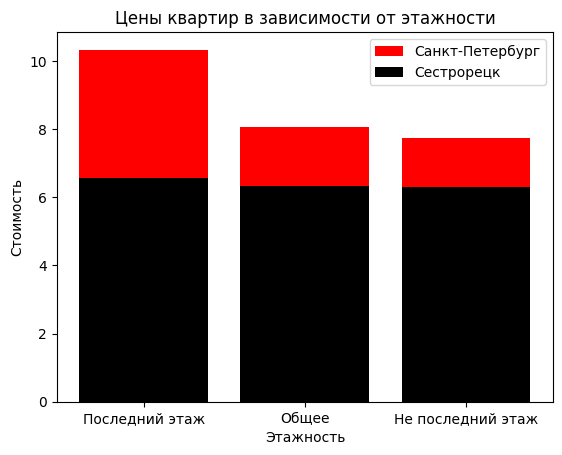

In [43]:
# теперь визуализируем все это

# Общее - цена на все квартиры, независимо от этажа

SP_vals = [SP_mean_price, SP_total_mean_price, SP_mean_price_non_last_floor]
SP_labels = ['Последний этаж', 'Общее', 'Не последний этаж']

SEST_vals = [SEST_mean_price, SEST_total_mean_price, SEST_mean_price_non_last_floor]
SEST_labels = ['Последний этаж', 'Общее', 'Не последний этаж']

plt.bar(SP_labels, SP_vals, color = 'red', label='Санкт-Петербург')
plt.bar(SEST_labels, SEST_vals, color = 'black', label='Сестрорецк')

plt.xlabel('Этажность')
plt.ylabel('Стоимость')
plt.title('Цены квартир в зависимости от этажности')

plt.legend()
plt.show()

# 10.  Что вы можете сказать в результате проделанной работы?

Я считаю что проделалана замечательная работа, которая дает нам понять рынок недвижимости определенной (Ленинградской наверное)
области России. Благодаря этому анализу, мы можем понять в каком городе или поселке выгоднее покупать квартиру. В данном задании
у нас получилось два "портрета" городов, то есть у нас есть данные описывающие его параметры, ориентируясь на которые можно сделать
различные выводы. Например:

1. Стоит ли покупать квартиру на последнем этаже?
    - Если вы урезаны в бюджете и ищете квартиру в Санкт-Петербурге, то лучше искать квартиру НЕ на последнем этаже :)
    - В Сестрорецке этажность сильно роли не играет (но на верхнем этаже немного дороже.
      Поэтому, почему бы и не на последнем этаже, главное чтобы лифт работал ;D
2. Стоит поторопиться с выбором квартиры, так как количество дней на продажу падает с каждым годом.
3. С большей вероятностью, если человек будет покупать квартиру в Санкт-Петербурге, то он купит 2-х комнатную квартиру, а в Сестрорецке 1-комнатную.

# 11. Теперь сформулируйте предложение, в каком городе лучше всего будет брать квартиру, помимо Санкт Петербурга, для дальнейшей перепродажи и сколько комнат лучше брать, чтобы произвести продажу быстрее?

# В ячейках ниже все рассчеты которые я провел для ответа на вопрос

### Выводы:
### - Исходя из рассчетов, два города - Луга и Кириши, показались мне самыми доступными.
### - В Кириши нет разницы на каком этаже покупать квартиру так как стоимость одинаковая, а вот в Луга дешевле обойдутся квартиры на последнем этаже
### - Если думаете купить 3-х комнатную квартиру в Луга то лучше посмотреть 4-комнтарные квартиры т.к. они дешевле или рассмотреть трехкомнатную в Кириши.
### - Ну а если бюджет урезан то самым доступным вариантом будет покупка 1-комнатной квартиры в Кириши (на любом этаже).
### - С переподажей квартир в этих городах проблем быть не должно так как они в Топ-5 по самому низкому числу дней для продажи.

In [44]:
outcome = df[df['locality_name'] != 'Санкт-Петербург'].copy()
outcome['year_part'] = df['first_day_exposition'].dt.year
outcome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5915 entries, 15721 to 21635
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          5915 non-null   int64         
 1   last_price            5915 non-null   float64       
 2   total_area            5915 non-null   float64       
 3   first_day_exposition  5915 non-null   datetime64[ns]
 4   rooms                 5915 non-null   int64         
 5   ceiling_height        5915 non-null   float64       
 6   floors_total          5915 non-null   float64       
 7   living_area           5915 non-null   float64       
 8   floor                 5915 non-null   int64         
 9   is_apartment          5915 non-null   object        
 10  studio                5915 non-null   bool          
 11  open_plan             5915 non-null   bool          
 12  kitchen_area          5915 non-null   float64       
 13  balcony           

<BarContainer object of 34 artists>

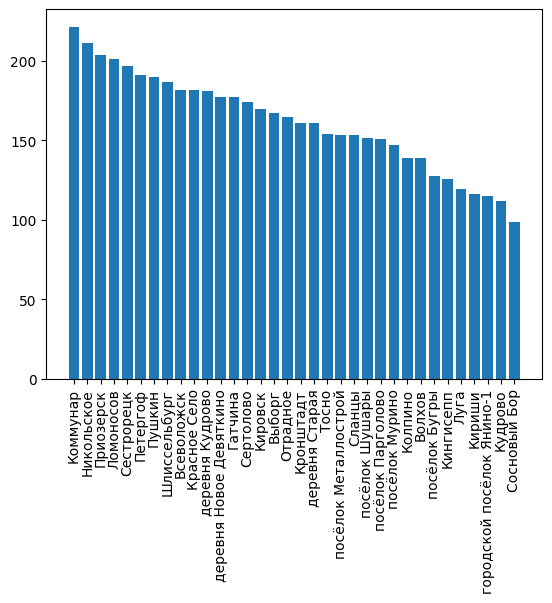

In [45]:
# своего рода рейтинг городов по кол-ву дней которое необходимо для продажи
# из них Топ-5 это - 1.Сосновый Бор, 2.Кудрово, 3.городской поселок Янино-1, 4.Кириши и 5.Луга
# покупая квартиру в этих городах, вероятно, будет проще потом её продать в отличие от всех остальных городов.

bar_plot = outcome.groupby('locality_name').agg({'days_exposition':'mean'}).sort_values(by='days_exposition', ascending=False).reset_index()

plt.xticks(rotation='vertical')
plt.bar(bar_plot['locality_name'], bar_plot['days_exposition'])

In [46]:
# теперь посмотрим что касется стоимости за кв.метр
outcome['PRICE_PER_SQUARED_METER'] = outcome['last_price'] / outcome['total_area']
outcome['PRICE_PER_SQUARED_METER'] = outcome['PRICE_PER_SQUARED_METER'].apply(lambda x: "{:,.3f}".format(x))
outcome['PRICE_PER_SQUARED_METER'] = outcome['PRICE_PER_SQUARED_METER'].str.replace(',', '').astype(float)
outcome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5915 entries, 15721 to 21635
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             5915 non-null   int64         
 1   last_price               5915 non-null   float64       
 2   total_area               5915 non-null   float64       
 3   first_day_exposition     5915 non-null   datetime64[ns]
 4   rooms                    5915 non-null   int64         
 5   ceiling_height           5915 non-null   float64       
 6   floors_total             5915 non-null   float64       
 7   living_area              5915 non-null   float64       
 8   floor                    5915 non-null   int64         
 9   is_apartment             5915 non-null   object        
 10  studio                   5915 non-null   bool          
 11  open_plan                5915 non-null   bool          
 12  kitchen_area             5915 non-

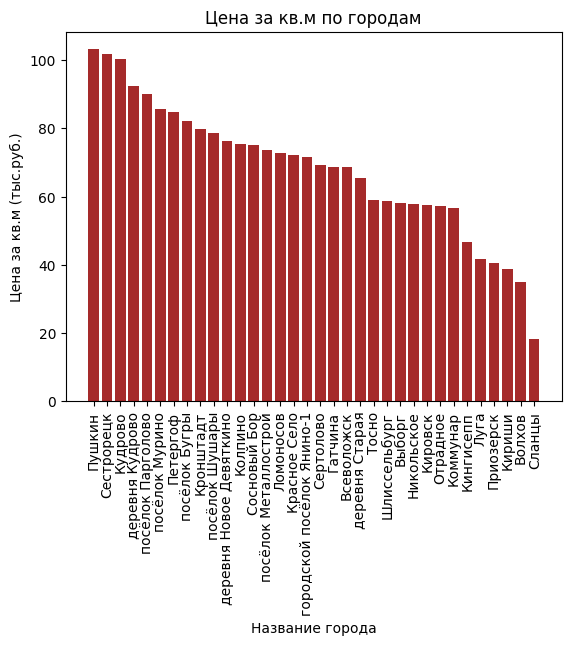

In [47]:
# Визуализируем по городам
sqm_price = outcome.groupby('locality_name').agg({'PRICE_PER_SQUARED_METER':'mean'})\
            .sort_values(by='PRICE_PER_SQUARED_METER', ascending=False).reset_index()
sqm_price['PRICE_PER_SQUARED_METER'] = sqm_price['PRICE_PER_SQUARED_METER'] / 1_000 # тысяч руб.

plt.xticks(rotation='vertical')
plt.bar(sqm_price['locality_name'], sqm_price['PRICE_PER_SQUARED_METER'], color='brown')

plt.xlabel('Название города')
plt.ylabel('Цена за кв.м (тыс.руб.)')
plt.title('Цена за кв.м по городам')

plt.show()

# И тут круг сужается, из нашего топ-5 в списке остаются два города - Луга и Кириши
# Далее буду работать только с ними

In [48]:
# уберу все остальные города
outcome = outcome[outcome['locality_name'].isin(['Луга', 'Кириши'])]

luga = outcome[outcome['locality_name'] == 'Луга'].copy()

luga_rooms_last_floor = luga.loc[luga['last_floor'] == True, ['rooms', 'last_price','last_floor']]
luga_rooms_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
luga_rooms_last_floor['last_price(mln)'] = luga_rooms_last_floor['last_price(mln)'] / 1_000_000

luga_non_last_floor = luga.loc[luga['last_floor'] == False, ['rooms', 'last_price', 'last_floor']]
luga_non_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
luga_non_last_floor['last_price(mln)'] = luga_non_last_floor['last_price(mln)'] / 1_000_000

luga_mean_price = round(luga_rooms_last_floor['last_price(mln)'].mean(), 2) # последний этаж
luga_total_mean_price = round((luga['last_price'] / 1_000_000).mean(), 2) # Общее
luga_mean_price_non_last_floor = round(luga_non_last_floor['last_price(mln)'].mean(), 2) # НЕ последний этаж

In [49]:
# уберу все остальные города
kirishi = outcome[outcome['locality_name'] == 'Кириши'].copy()

kirishi_rooms_last_floor = kirishi.loc[kirishi['last_floor'] == True, ['rooms', 'last_price','last_floor']]
kirishi_rooms_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
kirishi_rooms_last_floor['last_price(mln)'] = kirishi_rooms_last_floor['last_price(mln)'] / 1_000_000

kirishi_non_last_floor = kirishi.loc[kirishi['last_floor'] == False, ['rooms', 'last_price', 'last_floor']]
kirishi_non_last_floor.rename(columns={'last_price': 'last_price(mln)'}, inplace=True)
kirishi_non_last_floor['last_price(mln)'] = kirishi_non_last_floor['last_price(mln)'] / 1_000_000

kirishi_mean_price = round(kirishi_rooms_last_floor['last_price(mln)'].mean(), 2) # последний этаж
kirishi_total_mean_price = round((kirishi['last_price'] / 1_000_000).mean(), 2) # Общее
kirishi_mean_price_non_last_floor = round(kirishi_non_last_floor['last_price(mln)'].mean(), 2) # НЕ последний этаж

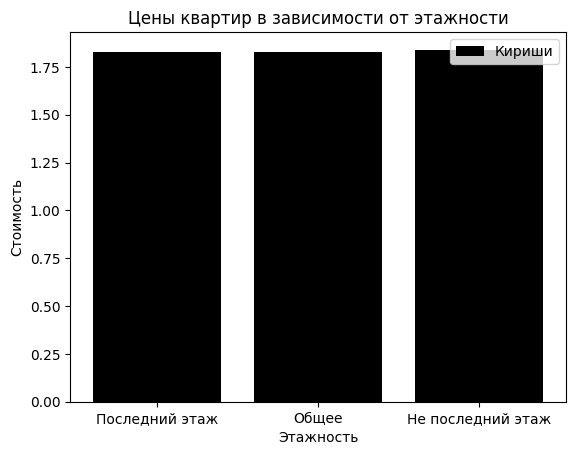

In [50]:
# теперь визуализируем все это

# Общее - цена на все квартиры, независимо от этажа

luga_vals = [luga_mean_price, luga_total_mean_price, luga_mean_price_non_last_floor]
luga_labels = ['Последний этаж', 'Общее', 'Не последний этаж']

kirishi_vals = [kirishi_mean_price, kirishi_total_mean_price, kirishi_mean_price_non_last_floor]
kirishi_labels = ['Последний этаж', 'Общее', 'Не последний этаж']

plt.bar(kirishi_labels, kirishi_vals, color = 'black', label='Кириши')
# plt.bar(luga_labels, luga_vals, color = 'red', label='Санкт-Петербург')

plt.xlabel('Этажность')
plt.ylabel('Стоимость')
plt.title('Цены квартир в зависимости от этажности')

plt.legend()
plt.show()

# В Кириши нет разницы на каком этаже покупать квартиру так как стоимость одинаковая

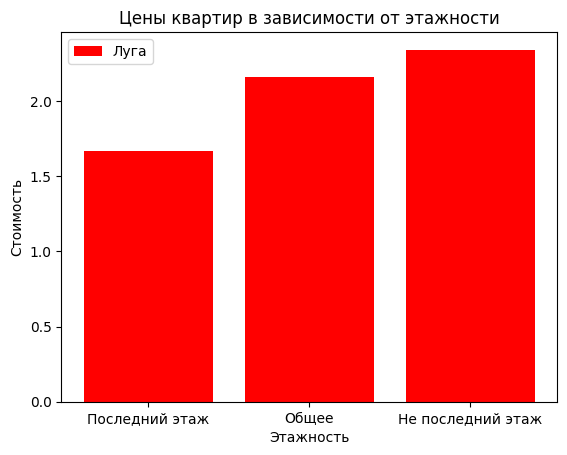

In [51]:
plt.bar(luga_labels, luga_vals, color = 'red', label='Луга')

plt.xlabel('Этажность')
plt.ylabel('Стоимость')
plt.title('Цены квартир в зависимости от этажности')

plt.legend()
plt.show()

# а вот в Луга дешевле обойдутся квартиры на последнем этаже

In [52]:
rooms_luga = luga.groupby('rooms').agg({'last_price': 'mean'}).sort_values(by='last_price').reset_index()
rooms_kirishi = kirishi.groupby('rooms').agg({'last_price': 'mean'}).sort_values(by='last_price').reset_index()

rooms_luga['last_price'] = rooms_luga['last_price'] / 1_000_000
rooms_kirishi['last_price'] = rooms_kirishi['last_price'] / 1_000_000

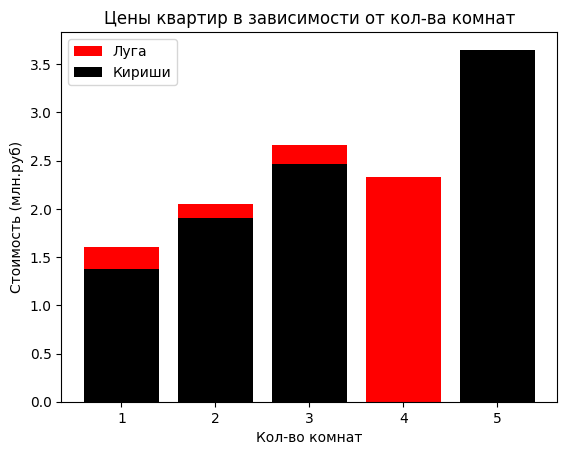

In [53]:
vals_luga = rooms_luga['last_price']
labels_luga = rooms_luga['rooms']

vals_kirishi = rooms_kirishi['last_price']
labels_kirishi = rooms_kirishi['rooms']

plt.bar(labels_luga, vals_luga , color = 'red', label='Луга')
plt.bar(labels_kirishi, vals_kirishi , color = 'black', label='Кириши')

plt.xlabel('Кол-во комнат')
plt.ylabel('Стоимость (млн.руб)')
plt.title('Цены квартир в зависимости от кол-ва комнат')

plt.legend()
plt.show()

# Если думаете купить 3-х комнатную квартиру в Луга то лучше посмотреть 4-комнтарные квартиры т.к. они дешевле или рассмотреть трехкомнатную в Кириши.
# Ну а если бюджет урезан то самым доступным вариантом будет покупка 1-комнатной квартиры в Кириши.